In [46]:
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# Read the Well files
data = pd.read_csv("well1/well1_pason.csv")

In [48]:
data.head()

,Hole Depth,Bit Depth,On Bottom,On Bottom Hours,On Bottom ROP,Mechanical Specific Energy,Block Height,Hook Load,Trip Speed,Weight on Bit,...,Gravity Toolface,Rig Sub State,Bit Depth.1,MWD Continuous Azi,MWD Continuous Inc,MWD TEMP (deg),Rate Of Penetration,Time Of Penetration,YYYY/MM/DD,HH:MM:SS
0,5565.0,5555.28,0,76.0,0.0,-999.25,4.9,16.3,0.0,0.0,...,134.75,0.0,5555.28,0.0,3735.0,98.44,0.0,0.0,2023/04/03,16:31:30
1,5565.0,5555.28,0,76.0,0.0,-999.25,4.9,16.3,0.0,0.0,...,134.75,0.0,5555.28,0.0,3735.0,98.44,0.0,0.0,2023/04/03,16:31:40
2,5565.0,5555.28,0,76.0,0.0,-999.25,4.9,16.3,0.0,0.0,...,134.75,0.0,5555.28,0.0,3735.0,98.44,0.0,0.0,2023/04/03,16:31:50
3,5565.0,5555.28,0,76.0,0.0,-999.25,4.9,16.2,0.0,0.0,...,134.75,0.0,5555.28,0.0,3735.0,98.44,0.0,0.0,2023/04/03,16:32:00
4,5565.0,5555.28,0,76.0,0.0,-999.25,4.9,16.2,0.0,0.0,...,134.75,0.0,5555.28,0.0,3735.0,98.44,0.0,0.0,2023/04/03,16:32:10


In [49]:
headers = [
   'Hole Depth',
   'Bit Depth',
 #  'On Bottom',
 #  'On Bottom Hours',
 #  'On Bottom ROP',
   'Mechanical Specific Energy',
 #  'Block Height',
   'Hook Load',
 #  'Trip Speed',
   'Weight on Bit',
   'Differential Pressure',
   'Rotary RPM',
   'Rotary Torque',
   'Total Pump Output',
 #  'Standpipe Pressure',
   'Gamma',
 #  'Inclination',
 #  'Azimuth',
 #  'Tool Face',
 #  'Magnetic Toolface',
   'Gravity Toolface',
   'Rig Sub State',
 #  'Bit Depth',
 #  'MWD Continuous Azi',
 #  'MWD Continuous Inc',
 #  'MWD TEMP (deg)',
   'Rate Of Penetration',
   'Time Of Penetration',
   'YYYY/MM/DD',
   'HH:MM:SS'
]

In [50]:
data = pd.read_csv(
    "well1/well1_pason.csv", skipinitialspace=True, usecols=headers, low_memory=False,
    index_col=0
)

In [51]:
data.info

<bound method DataFrame.info of             Bit Depth  Mechanical Specific Energy  Hook Load  Weight on Bit  \
Hole Depth                                                                    
5565.0        5555.28                     -999.25       16.3            0.0   
5565.0        5555.28                     -999.25       16.3            0.0   
5565.0        5555.28                     -999.25       16.3            0.0   
5565.0        5555.28                     -999.25       16.2            0.0   
5565.0        5555.28                     -999.25       16.2            0.0   
...               ...                         ...        ...            ...   
0.0              0.00                     -999.25        0.4            0.0   
0.0              0.00                     -999.25        0.4            0.0   
0.0              0.00                     -999.25        0.4            0.0   
0.0              0.00                     -999.25        0.4            0.0   
0.0              0.0

In [52]:
data['DateTime'] = pd.to_datetime(data['YYYY/MM/DD'] + ' ' + data['HH:MM:SS'])

In [53]:
data.head()

,Bit Depth,Mechanical Specific Energy,Hook Load,Weight on Bit,Differential Pressure,Rotary RPM,Rotary Torque,Total Pump Output,Gamma,Gravity Toolface,Rig Sub State,Rate Of Penetration,Time Of Penetration,YYYY/MM/DD,HH:MM:SS,DateTime
Hole Depth,,,,,,,,,,,,,,,,
5565.0,5555.28,-999.25,16.3,0.0,-23170.9,0.0,0.00,0.0,-999.25,134.75,0.0,0.0,0.0,2023/04/03,16:31:30,2023-04-03 16:31:30
5565.0,5555.28,-999.25,16.3,0.0,-23170.9,0.0,0.00,0.0,-999.25,134.75,0.0,0.0,0.0,2023/04/03,16:31:40,2023-04-03 16:31:40
5565.0,5555.28,-999.25,16.3,0.0,-23170.9,0.0,0.00,0.0,-999.25,134.75,0.0,0.0,0.0,2023/04/03,16:31:50,2023-04-03 16:31:50
5565.0,5555.28,-999.25,16.2,0.0,-23170.9,0.0,1875.43,0.0,-999.25,134.75,0.0,0.0,0.0,2023/04/03,16:32:00,2023-04-03 16:32:00
5565.0,5555.28,-999.25,16.2,0.0,-23170.9,0.0,1792.80,0.0,-999.25,134.75,0.0,0.0,0.0,2023/04/03,16:32:10,2023-04-03 16:32:10


In [54]:
data = data.drop(['YYYY/MM/DD','HH:MM:SS'], axis=1)

In [55]:
data.head()

,Bit Depth,Mechanical Specific Energy,Hook Load,Weight on Bit,Differential Pressure,Rotary RPM,Rotary Torque,Total Pump Output,Gamma,Gravity Toolface,Rig Sub State,Rate Of Penetration,Time Of Penetration,DateTime
Hole Depth,,,,,,,,,,,,,,
5565.0,5555.28,-999.25,16.3,0.0,-23170.9,0.0,0.00,0.0,-999.25,134.75,0.0,0.0,0.0,2023-04-03 16:31:30
5565.0,5555.28,-999.25,16.3,0.0,-23170.9,0.0,0.00,0.0,-999.25,134.75,0.0,0.0,0.0,2023-04-03 16:31:40
5565.0,5555.28,-999.25,16.3,0.0,-23170.9,0.0,0.00,0.0,-999.25,134.75,0.0,0.0,0.0,2023-04-03 16:31:50
5565.0,5555.28,-999.25,16.2,0.0,-23170.9,0.0,1875.43,0.0,-999.25,134.75,0.0,0.0,0.0,2023-04-03 16:32:00
5565.0,5555.28,-999.25,16.2,0.0,-23170.9,0.0,1792.80,0.0,-999.25,134.75,0.0,0.0,0.0,2023-04-03 16:32:10


In [56]:
data.set_index('DateTime', inplace=True)


In [57]:
# Resample with a 15-minute frequency
data_resample = data.resample('15min').mean()

In [58]:
# generate the figure
traces = list(data.columns.values)

In [59]:
fig = make_subplots(
    rows=1, cols=len(traces),
    shared_yaxes=True,
    subplot_titles=traces
)

In [60]:
for i, t in enumerate(traces):
    fig.add_trace(
        go.Scattergl(
            x=data_resample[t], y=data_resample.index,
            name=t
        ),
        col=i+1, row=1,
    )

In [61]:
fig.update_layout(
    showlegend=False,
    yaxis=dict(
        autorange='reversed'
    ),
    title_text="drilling realtime visualization",
)

fig.layout[f"xaxis{traces.index('Hook Load')+1}"]['range'] = (
    [-200, 4e6]
)

In [62]:
fig.show()

### ROP Analysis

In [63]:
data.describe()

,Bit Depth,Mechanical Specific Energy,Hook Load,Weight on Bit,Differential Pressure,Rotary RPM,Rotary Torque,Total Pump Output,Gamma,Gravity Toolface,Rig Sub State,Rate Of Penetration,Time Of Penetration
count,92584.000000,9.258400e+04,92584.000000,92584.000000,92584.000000,92584.000000,92584.000000,92584.000000,92584.000000,92584.000000,92584.000000,92584.000000,9.258400e+04
mean,2632.146555,1.807189e+08,43.273185,6.117158,-8372.999593,16.768985,3675.474633,-54.246668,-389.000544,2.388049,2.580981,22.291121,1.013030e+09
std,1858.481629,3.391057e+09,25.482344,6.659403,13129.325918,26.852551,4999.679923,228.027815,551.579647,90.348807,14.230738,40.784612,2.529046e+11
min,0.000000,-9.992500e+02,-999.250000,0.000000,-28539.100000,-999.250000,-999.250000,-999.250000,-999.250000,-179.880000,-999.250000,-999.250000,-9.992500e+02
25%,859.800000,-9.992500e+02,17.600000,0.000000,-20060.900000,0.000000,0.000000,0.000000,-999.250000,-77.500000,1.000000,0.000000,0.000000e+00
50%,2463.720000,-9.992500e+02,51.600000,4.700000,-161.000000,0.000000,850.051000,1.000000,37.690000,1.250000,2.000000,0.000000,0.000000e+00
75%,4194.505000,4.330000e+01,60.200000,12.000000,2992.050000,30.000000,6810.790000,1.190000,114.550000,62.000000,5.000000,27.520000,8.700000e-01
max,5701.000000,2.457470e+11,109.900000,55.200000,12146.800000,82.000000,31927.000000,8.460000,1889.450000,177.880000,11.000000,1742.360000,7.678555e+13


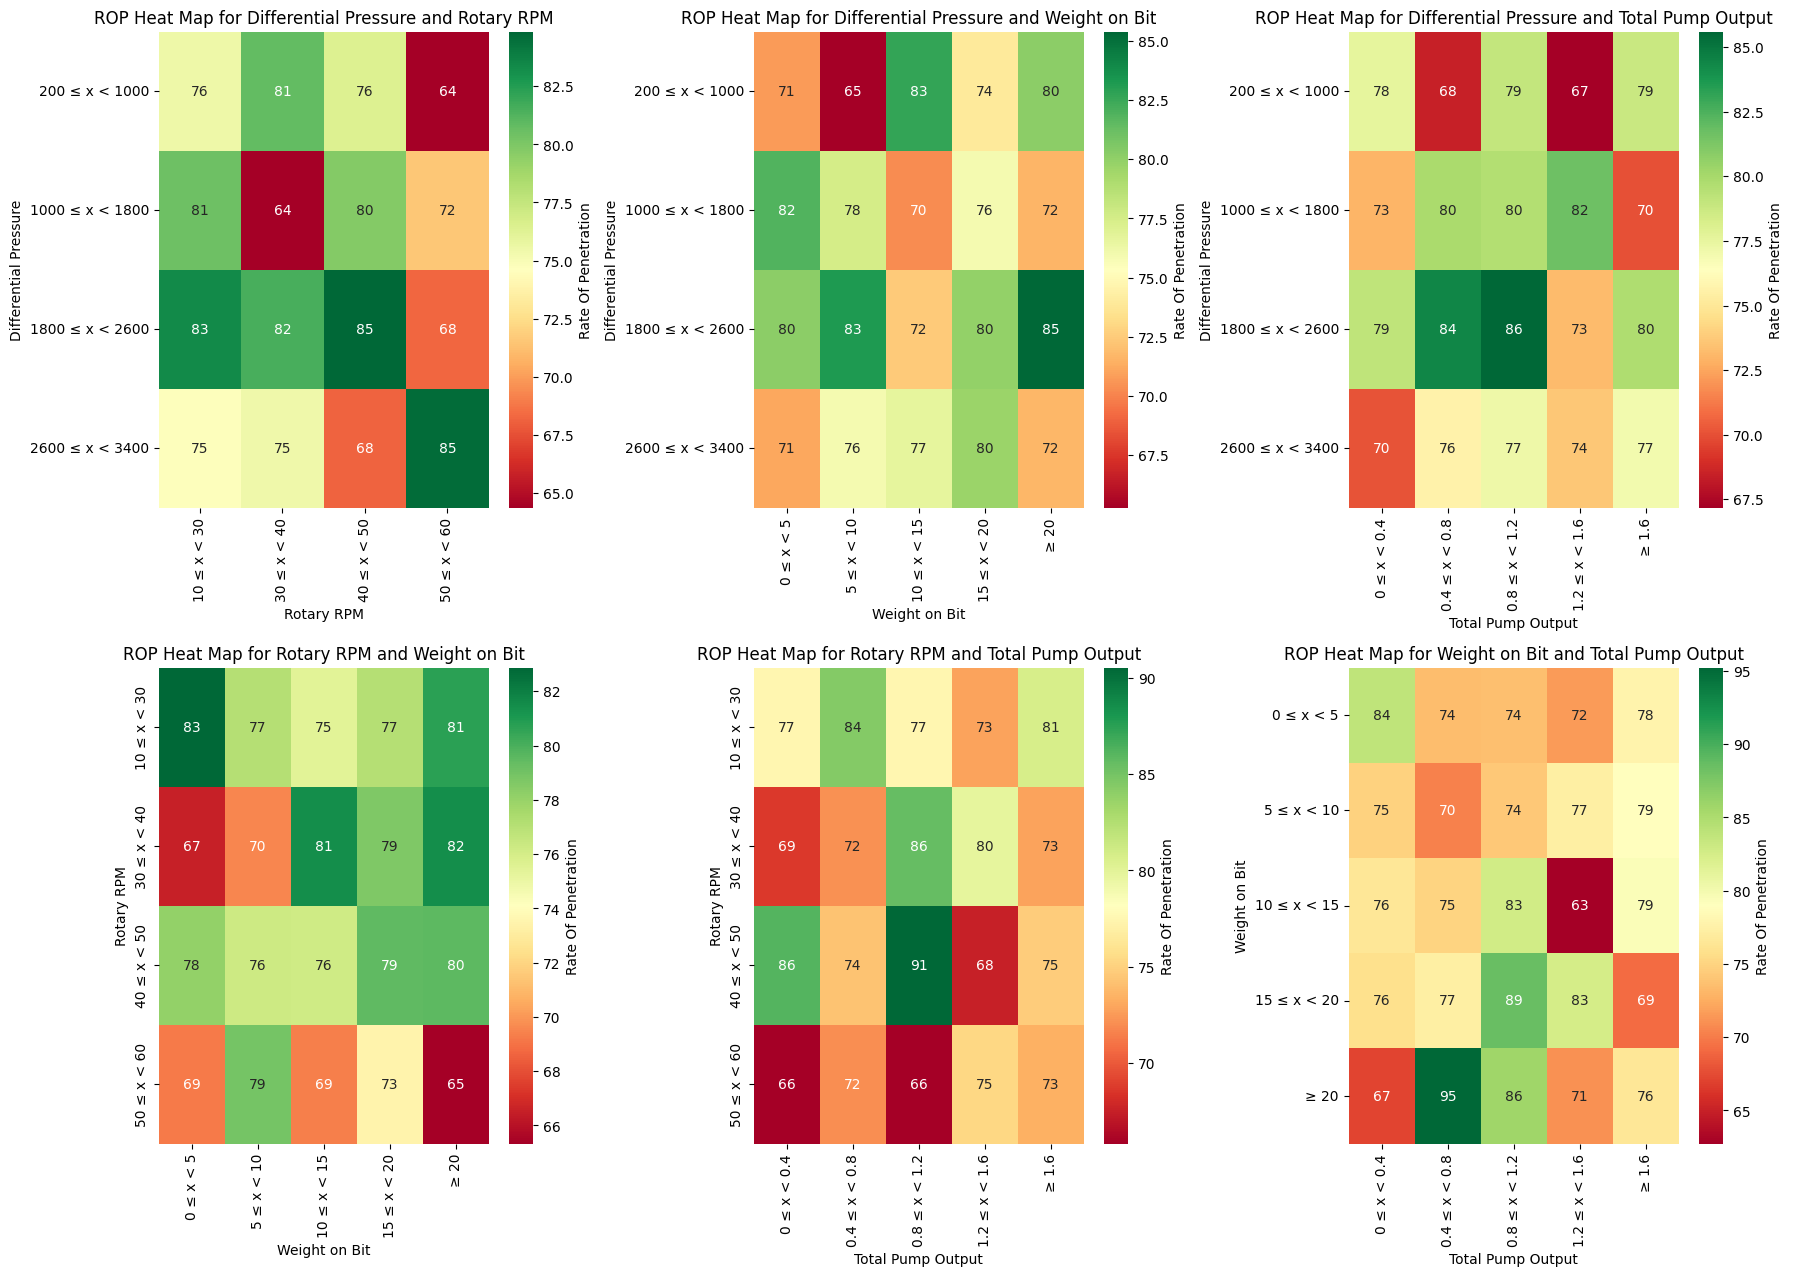

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data creation for demonstration (replace this with your actual data)
data = pd.DataFrame({
    'Differential Pressure': np.random.uniform(200, 3400, 1000),
    'Rotary RPM': np.random.uniform(10, 60, 1000),
    'Weight on Bit': np.random.uniform(0, 25, 1000),
    'Total Pump Output': np.random.uniform(0, 2.3, 1000),
    'Rate Of Penetration': np.random.uniform(10, 150, 1000)
})

# Extract relevant columns
ROP_data = data[['Differential Pressure', 'Rotary RPM', 'Rate Of Penetration', 'Total Pump Output', 'Weight on Bit']].copy()

# Function to generate ROP heatmap
def generate_rop_heatmap(parameter1, parameter2, ROP_data, ax):
    # Define bins and labels for parameters
    parameter_bins = {
        'Differential Pressure': [200, 1000, 1800, 2600, 3400, np.inf],
        'Rotary RPM': [10, 30, 40, 50, 60, np.inf],
        'Weight on Bit': [0, 5, 10, 15, 20, np.inf],
        'Total Pump Output': [0, 0.4, 0.8, 1.2, 1.6, np.inf]
    }
    
    parameter_labels = {
        'Differential Pressure': ["200 ≤ x < 1000", "1000 ≤ x < 1800", "1800 ≤ x < 2600", "2600 ≤ x < 3400", "≥ 3400"],
        'Rotary RPM': ["10 ≤ x < 30", "30 ≤ x < 40", "40 ≤ x < 50", "50 ≤ x < 60", "≥ 60"],
        'Weight on Bit': ["0 ≤ x < 5", "5 ≤ x < 10", "10 ≤ x < 15", "15 ≤ x < 20", "≥ 20"],
        'Total Pump Output': ["0 ≤ x < 0.4", "0.4 ≤ x < 0.8", "0.8 ≤ x < 1.2", "1.2 ≤ x < 1.6", "≥ 1.6"]
    }
    
    # Bin the data for each parameter
    ROP_data['Parameter1 Bin'] = pd.cut(ROP_data[parameter1], bins=parameter_bins[parameter1], labels=parameter_labels[parameter1])
    ROP_data['Parameter2 Bin'] = pd.cut(ROP_data[parameter2], bins=parameter_bins[parameter2], labels=parameter_labels[parameter2])

    # Pivot the table to create a matrix for the heatmap
    heatmap_data = ROP_data.pivot_table(index='Parameter1 Bin', columns='Parameter2 Bin', values='Rate Of Penetration', aggfunc='mean', observed=False)
    
    # Plot the heatmap
    sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="RdYlGn", cbar_kws={'label': 'Rate Of Penetration'}, ax=ax)
    ax.set_title(f'ROP Heat Map for {parameter1} and {parameter2}')
    ax.set_xlabel(parameter2)
    ax.set_ylabel(parameter1)

# Create subplot grid
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# All parameter combinations
parameters = ['Differential Pressure', 'Rotary RPM', 'Weight on Bit', 'Total Pump Output']
combinations = [(parameters[i], parameters[j]) for i in range(len(parameters)) for j in range(i+1, len(parameters))]

# Generate ROP heatmaps for selected parameters
for i, (param1, param2) in enumerate(combinations):
    row = i // 3
    col = i % 3
    generate_rop_heatmap(param1, param2, ROP_data, axs[row, col])

# Remove any unused subplots
if len(combinations) < 9:
    for j in range(len(combinations), 9):
        fig.delaxes(axs.flatten()[j])

# Adjust layout
plt.tight_layout()
plt.show()